
## Basic Imports

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Reading a csv file

In [ ]:
df = pd.read_csv("Employee-Attrition.csv")

In [ ]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


## Getting information from csv file

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Statistical description of dataset

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Checking the null value

In [ ]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Getting the numerical dtype value columns from dataset

In [ ]:
num_data = df.select_dtypes(exclude="object")
len(num_data.columns)

26

## In numerical dtype value column, there are 8 numerical dtype value column which is ordinal in nature

## Integer Float type data

In [ ]:
int_data = df[['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeCount',
       'EmployeeNumber', 'HourlyRate',
      'JobLevel', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StandardHours',
        'TotalWorkingYears', 'TrainingTimesLastYear',
        'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']]
len(int_data.columns)

18

In [ ]:
u=[]
for i in int_data['YearsInCurrentRole'].unique():
  u.append(i)

u.sort()
print(u)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


## Ordinal type data

In [ ]:
ord_data = df[['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating', 'RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']]
len(ord_data.columns)

8

## Statistical Analysis of Real number Numerical type data

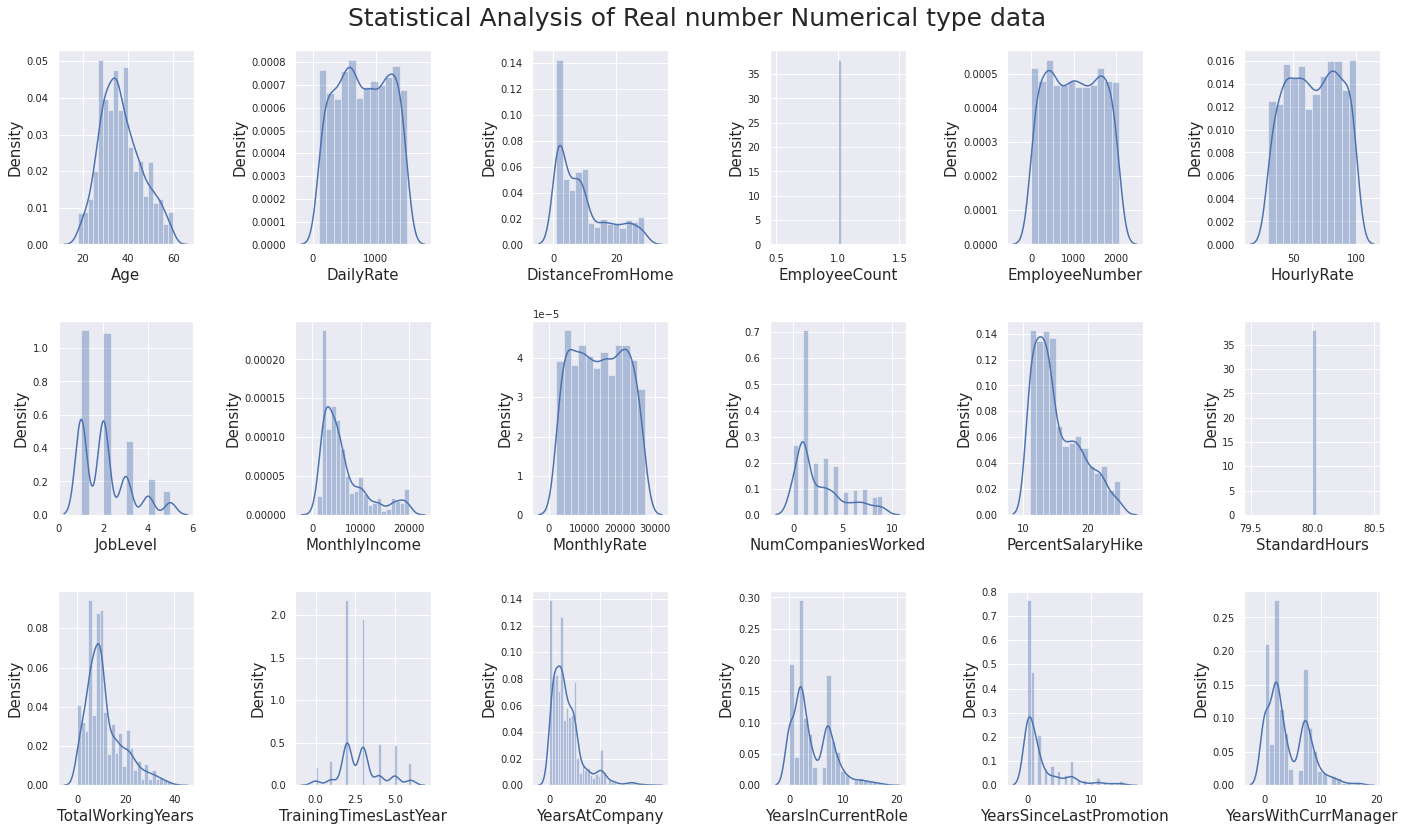

In [ ]:
sns.set(rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":15,"xtick.labelsize":10,"ytick.labelsize":10,
            "legend.fontsize":12})
fig = plt.figure(figsize=(20,12))

for index,cols in enumerate(int_data):
    plt.subplot(3,6,index+1)
    fig.suptitle("Statistical Analysis of Real number Numerical type data",fontsize=25)
    sns.distplot(num_data.loc[:,cols])
plt.tight_layout(pad=2)
fig.subplots_adjust(top=0.93)
plt.show()


## As shown in above figure, EmployeeCount & StandardHours are only one unique value, so droping such columns

In [ ]:
int_data = int_data.drop(['EmployeeCount', 'StandardHours'],axis=1)

## Creating a function which gives skewed column name

In [ ]:
from scipy.stats import skew,kurtosis
def skewed(data):
  t=[]
  for i in data.columns:
    skewness = data[i].skew()
    if(skewness>1.96 or skewness<=-1.96):
      t.append(i)
  return t


In [ ]:
skewed(int_data)

['YearsSinceLastPromotion']

## Normalization of skewed column

In [ ]:
int_data["YearsSinceLastPromotion"] = np.sqrt(int_data["YearsSinceLastPromotion"])

In [ ]:
skewed(int_data)

[]

## Checking Outlier & treatment on outliers

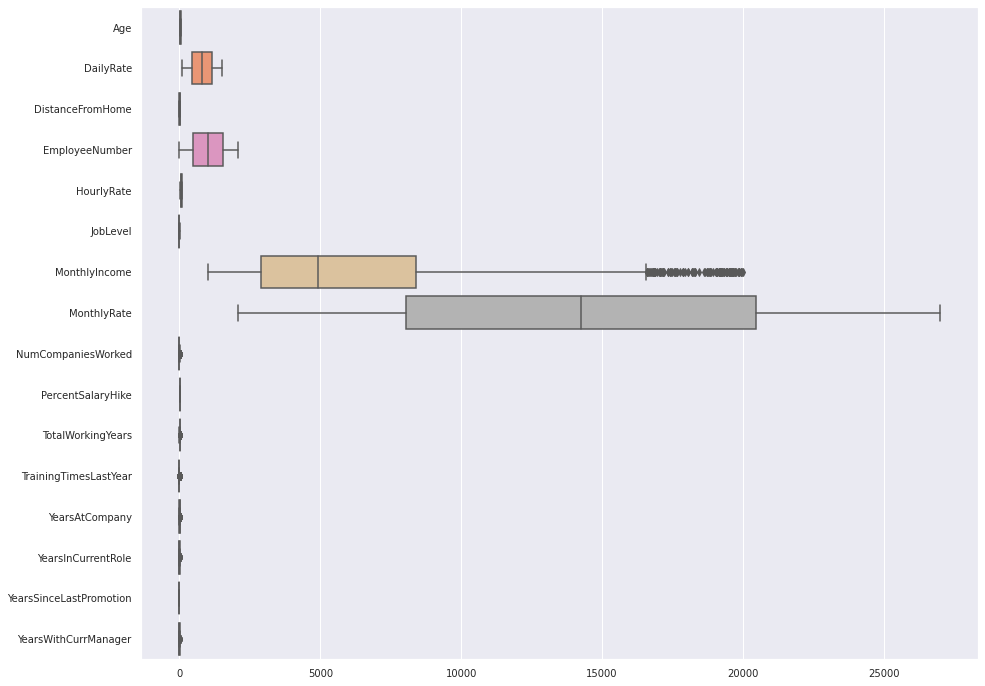

In [ ]:
plt.figure(figsize=(15,12))
sns.boxplot(data=int_data, orient="h", palette="Set2")
plt.show()

In [ ]:
print(int_data['MonthlyIncome'].quantile(0.10))
print(int_data['MonthlyIncome'].quantile(0.90))


2317.6
13775.600000000008


In [ ]:
int_data["MonthlyIncome"] = np.where(int_data["MonthlyIncome"] <2317.6, 2317.6,int_data['MonthlyIncome'])
int_data["MonthlyIncome"] = np.where(int_data["MonthlyIncome"] >13775.600000000008, 13775.600000000008,int_data['MonthlyIncome'])
print(int_data["MonthlyIncome"].skew())

0.9163713456638363


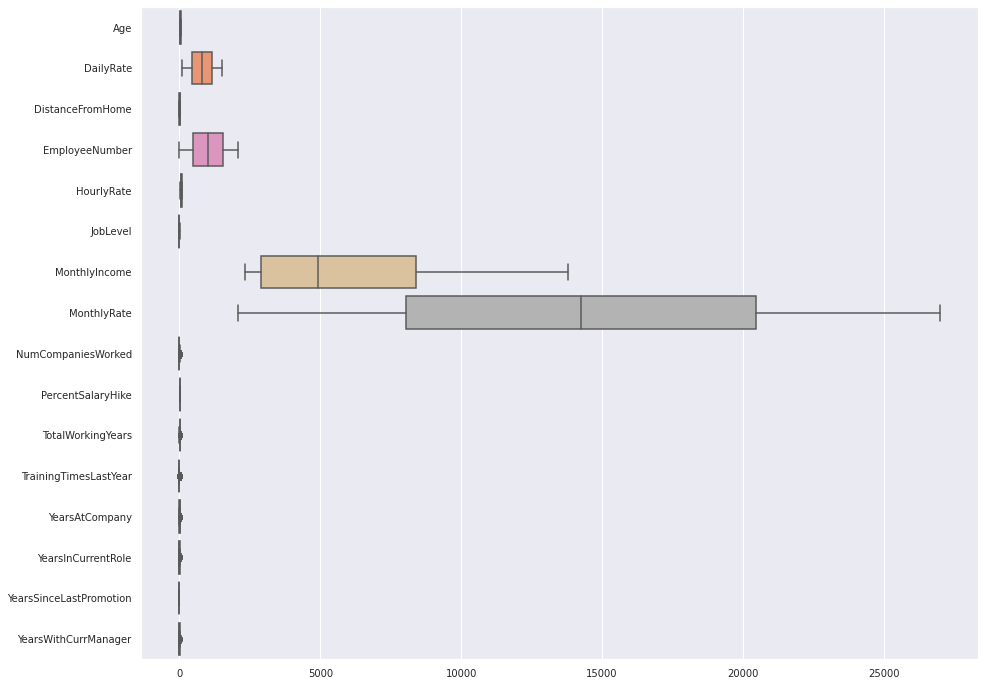

In [ ]:
plt.figure(figsize=(15,12))
sns.boxplot(data=int_data, orient="h", palette="Set2")
plt.show()

In [ ]:
int_data.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate',
       'JobLevel', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

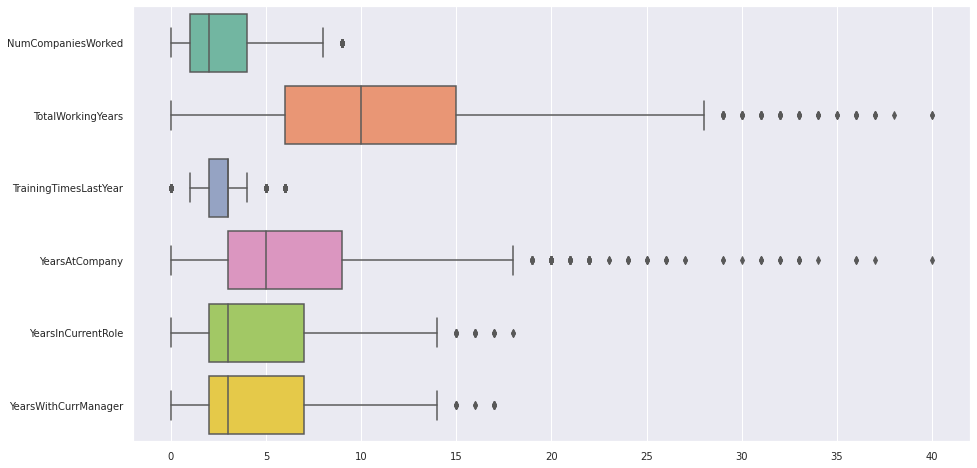

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=int_data[['NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole',
       'YearsWithCurrManager']], orient="h", palette="Set2")
plt.show()

In [ ]:
print(int_data['NumCompaniesWorked'].quantile(0.90))
int_data['NumCompaniesWorked'] = np.where(int_data['NumCompaniesWorked']>7.0,7.0,int_data['NumCompaniesWorked'])
print(int_data['NumCompaniesWorked'].skew())

7.0
0.7881096367446891


In [ ]:
print(int_data['TotalWorkingYears'].quantile(0.90))
int_data['TotalWorkingYears'] = np.where(int_data['TotalWorkingYears']>23.0,23.0,int_data['TotalWorkingYears'])
print(int_data['TotalWorkingYears'].skew())

23.0
0.550670616777844


In [ ]:
print(int_data['TrainingTimesLastYear'].quantile(0.10))
print(int_data['TrainingTimesLastYear'].quantile(0.90))
int_data['TrainingTimesLastYear'] = np.where(int_data['TrainingTimesLastYear']<2.0,2.0,int_data['TrainingTimesLastYear'])
int_data['TrainingTimesLastYear'] = np.where(int_data['TrainingTimesLastYear']>5.0,5.0,int_data['TrainingTimesLastYear'])
print(int_data['TrainingTimesLastYear'].skew())

2.0
5.0
0.971283769509861


In [ ]:
print(int_data['YearsAtCompany'].quantile(0.90))
int_data['YearsAtCompany'] = np.where(int_data['YearsAtCompany']>15.0,15.0,int_data['YearsAtCompany'])
print(int_data['YearsAtCompany'].skew())

15.0
0.5870666888624433


In [ ]:
print(int_data['YearsInCurrentRole'].quantile(0.90))
int_data['YearsInCurrentRole'] = np.where(int_data['YearsInCurrentRole']>9.0,9.0,int_data['YearsInCurrentRole'])
print(int_data['YearsInCurrentRole'].skew())

9.0
0.32895991946815467


In [ ]:
print(int_data['YearsWithCurrManager'].quantile(0.99))
int_data['YearsWithCurrManager'] = np.where(int_data['YearsWithCurrManager']>14,14,int_data['YearsWithCurrManager'])
print(int_data['YearsWithCurrManager'].skew())

14.0
0.7196100045304419


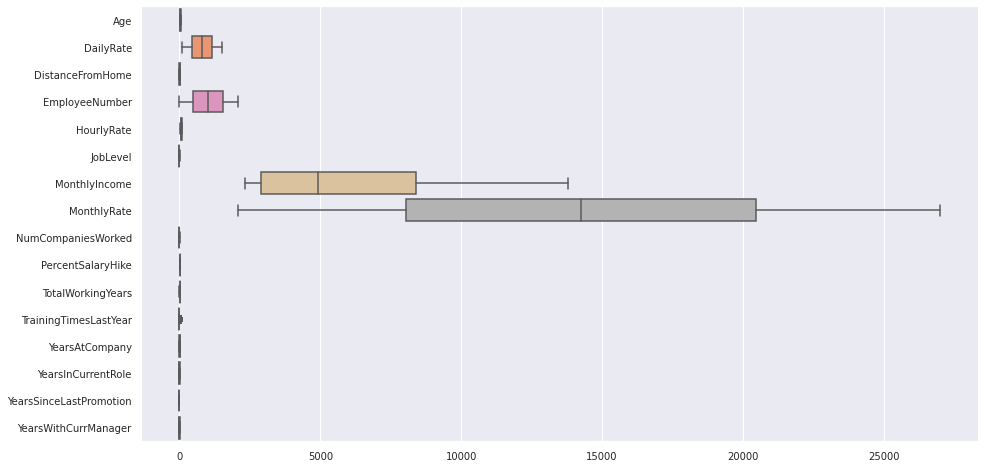

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=int_data, orient="h", palette="Set2")
plt.show()

## Now there is no outlier present in dataset

## Getting the object dtype value columns from dataset

In [ ]:
obj_data = df.select_dtypes(include="object")

In [ ]:
obj_data

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


## Countplot for object dtype data

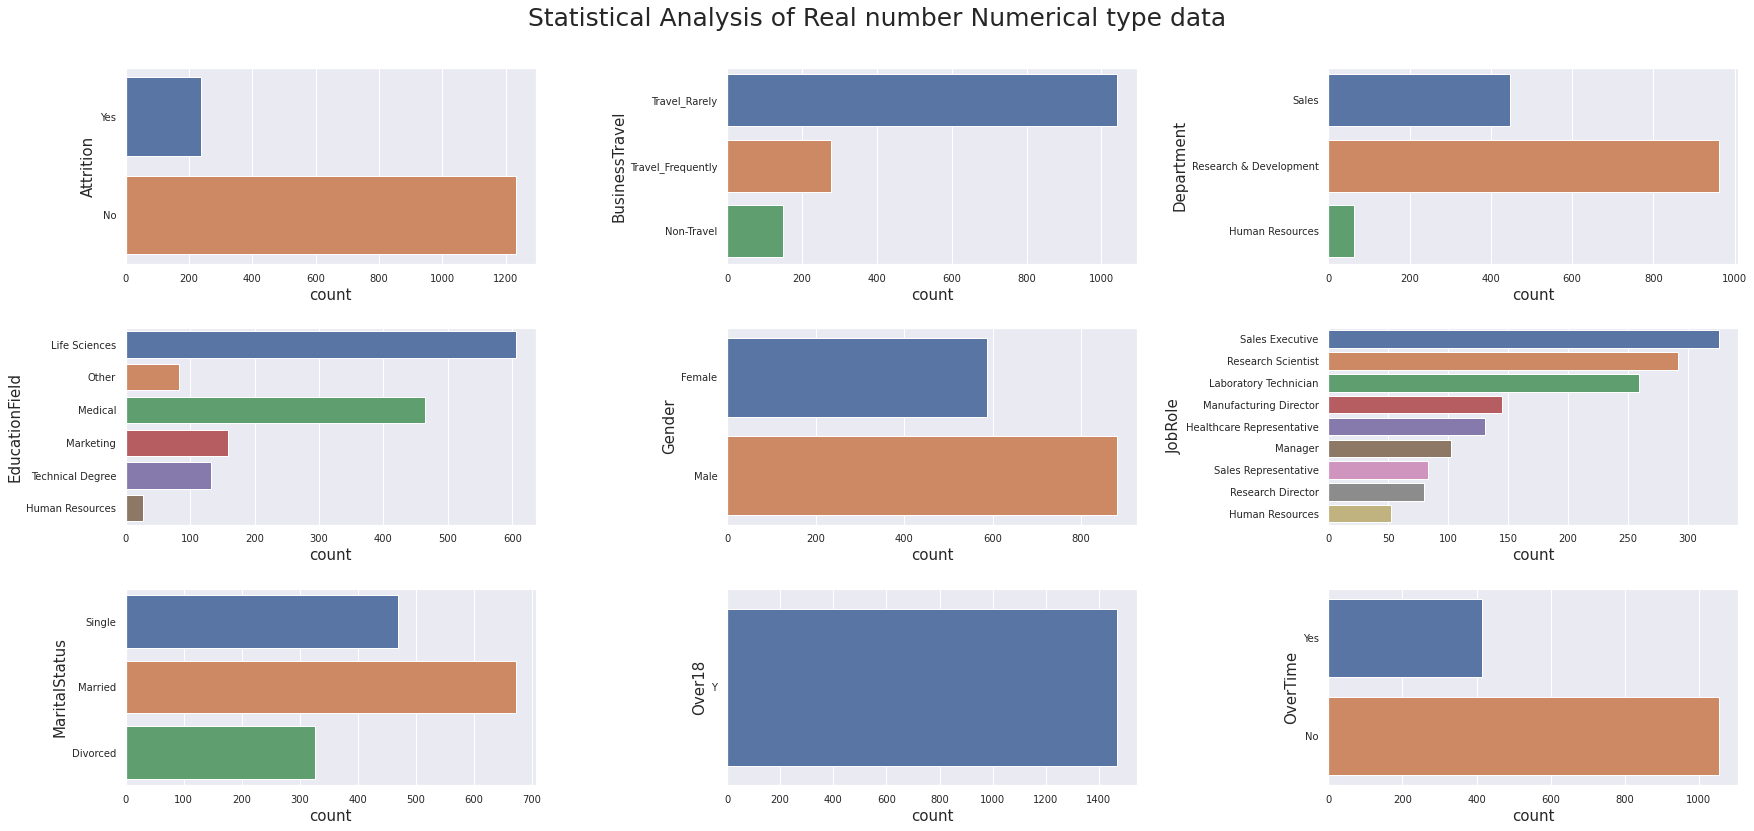

In [ ]:
fig = plt.figure(figsize=(25,12))
fig.suptitle("Statistical Analysis of Real number Numerical type data",fontsize=25)

for index,cols in enumerate(obj_data):
    plt.subplot(3,3,index+1)
    sns.countplot(y=obj_data.loc[:,cols])
plt.tight_layout(pad=2)
fig.subplots_adjust(top=0.91)

## As shown in above figure, Over18 have only one unique value, so droping such columns

In [ ]:
obj_data = obj_data.drop('Over18',axis=1)

## Creating final dataframe after data pre process

In [ ]:
final_df = pd.concat([int_data,ord_data,obj_data],axis=1)

In [ ]:
final_df

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,41,1102,1,1,94,2,5993.0,19479,7.0,11,8.0,2.0,6.0,4.0,0.000000,5,2,2,3,4,3,1,0,1,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,49,279,8,2,61,2,5130.0,24907,1.0,23,10.0,3.0,10.0,7.0,1.000000,7,1,3,2,2,4,4,1,3,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,37,1373,2,4,92,1,2317.6,2396,6.0,15,7.0,3.0,0.0,0.0,0.000000,0,2,4,2,3,3,2,0,3,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,33,1392,3,5,56,1,2909.0,23159,1.0,11,8.0,3.0,8.0,7.0,1.732051,0,4,4,3,3,3,3,0,3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,27,591,2,7,40,1,3468.0,16632,7.0,12,6.0,3.0,2.0,2.0,1.414214,2,1,1,3,2,3,4,1,3,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2061,41,2,2571.0,12290,4.0,17,17.0,3.0,5.0,2.0,0.000000,3,2,3,4,4,3,3,1,3,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,39,613,6,2062,42,3,9991.0,21457,4.0,15,9.0,5.0,7.0,7.0,1.000000,7,1,4,2,1,3,1,1,3,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,27,155,4,2064,87,2,6142.0,5174,1.0,20,6.0,2.0,6.0,2.0,0.000000,3,3,2,4,2,4,2,1,3,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,49,1023,2,2065,63,2,5390.0,13243,2.0,14,17.0,3.0,9.0,6.0,0.000000,8,3,4,2,2,3,4,0,2,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


## Rearranging the columns

In [ ]:
final_df = final_df[['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate',
       'JobLevel', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobSatisfaction', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance',
       'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus','OverTime','Attrition']]

In [ ]:
final_df

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Attrition
0,41,1102,1,1,94,2,5993.0,19479,7.0,11,8.0,2.0,6.0,4.0,0.000000,5,2,2,3,4,3,1,0,1,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes,Yes
1,49,279,8,2,61,2,5130.0,24907,1.0,23,10.0,3.0,10.0,7.0,1.000000,7,1,3,2,2,4,4,1,3,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No,No
2,37,1373,2,4,92,1,2317.6,2396,6.0,15,7.0,3.0,0.0,0.0,0.000000,0,2,4,2,3,3,2,0,3,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes,Yes
3,33,1392,3,5,56,1,2909.0,23159,1.0,11,8.0,3.0,8.0,7.0,1.732051,0,4,4,3,3,3,3,0,3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes,No
4,27,591,2,7,40,1,3468.0,16632,7.0,12,6.0,3.0,2.0,2.0,1.414214,2,1,1,3,2,3,4,1,3,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2061,41,2,2571.0,12290,4.0,17,17.0,3.0,5.0,2.0,0.000000,3,2,3,4,4,3,3,1,3,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No,No
1466,39,613,6,2062,42,3,9991.0,21457,4.0,15,9.0,5.0,7.0,7.0,1.000000,7,1,4,2,1,3,1,1,3,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No,No
1467,27,155,4,2064,87,2,6142.0,5174,1.0,20,6.0,2.0,6.0,2.0,0.000000,3,3,2,4,2,4,2,1,3,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes,No
1468,49,1023,2,2065,63,2,5390.0,13243,2.0,14,17.0,3.0,9.0,6.0,0.000000,8,3,4,2,2,3,4,0,2,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No,No


## Machine Learning model dont understand the object type datv so we have to convert object type data into numeric type data

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

final_df[['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime']] = final_df[['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime']].apply(label.fit_transform)


## Defining feature & target

In [ ]:
x = final_df.iloc[:,:-1] ## feature
y = final_df.iloc[:,-1]  ## target

In [ ]:
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

## From above observation, data is looklike imbalanced so we have to balanced it

In [ ]:
from imblearn.over_sampling import RandomOverSampler
samplr = RandomOverSampler()
x_over,y_over = samplr.fit_sample(x,y)

In [ ]:
x_over = pd.DataFrame(x_over)
x_over.columns = ['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate',
       'JobLevel', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobSatisfaction', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance',
       'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime']
y_over = pd.DataFrame(y_over)
y_over.columns = ['Attrition']


In [ ]:
y_over.value_counts()

Attrition
1            1233
0            1233
dtype: int64

## Now we can say that data is balanced

In [ ]:
x_over

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,41.0,1102.0,1.0,1.0,94.0,2.0,5993.0,19479.0,7.0,11.0,8.0,2.0,6.0,4.0,0.000000,5.0,2.0,2.0,3.0,4.0,3.0,1.0,0.0,1.0,2.0,2.0,1.0,0.0,7.0,2.0,1.0
1,49.0,279.0,8.0,2.0,61.0,2.0,5130.0,24907.0,1.0,23.0,10.0,3.0,10.0,7.0,1.000000,7.0,1.0,3.0,2.0,2.0,4.0,4.0,1.0,3.0,1.0,1.0,1.0,1.0,6.0,1.0,0.0
2,37.0,1373.0,2.0,4.0,92.0,1.0,2317.6,2396.0,6.0,15.0,7.0,3.0,0.0,0.0,0.000000,0.0,2.0,4.0,2.0,3.0,3.0,2.0,0.0,3.0,2.0,1.0,4.0,1.0,2.0,2.0,1.0
3,33.0,1392.0,3.0,5.0,56.0,1.0,2909.0,23159.0,1.0,11.0,8.0,3.0,8.0,7.0,1.732051,0.0,4.0,4.0,3.0,3.0,3.0,3.0,0.0,3.0,1.0,1.0,1.0,0.0,6.0,1.0,1.0
4,27.0,591.0,2.0,7.0,40.0,1.0,3468.0,16632.0,7.0,12.0,6.0,3.0,2.0,2.0,1.414214,2.0,1.0,1.0,3.0,2.0,3.0,4.0,1.0,3.0,2.0,1.0,3.0,1.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,29.0,805.0,1.0,816.0,36.0,1.0,2319.0,6689.0,1.0,11.0,1.0,2.0,1.0,0.0,0.000000,0.0,2.0,2.0,2.0,1.0,3.0,4.0,1.0,3.0,2.0,1.0,1.0,0.0,2.0,1.0,1.0
2462,39.0,1122.0,6.0,932.0,70.0,1.0,2404.0,4303.0,7.0,21.0,8.0,2.0,2.0,2.0,1.414214,2.0,3.0,4.0,3.0,1.0,4.0,4.0,0.0,1.0,2.0,1.0,3.0,1.0,2.0,1.0,1.0
2463,29.0,1092.0,1.0,2027.0,36.0,1.0,4787.0,26124.0,7.0,14.0,4.0,3.0,2.0,2.0,1.414214,2.0,4.0,1.0,3.0,4.0,3.0,2.0,3.0,4.0,2.0,1.0,3.0,1.0,6.0,1.0,1.0
2464,56.0,441.0,14.0,161.0,72.0,1.0,4963.0,4510.0,7.0,18.0,7.0,2.0,5.0,4.0,2.000000,3.0,4.0,2.0,3.0,2.0,3.0,1.0,3.0,3.0,2.0,1.0,1.0,0.0,6.0,1.0,1.0


## Data standardization is about making sure that data is internally consistent; that is, each data type has the same content and format.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x_over)
x = pd.DataFrame(x)
x.columns = ['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate',
       'JobLevel', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobSatisfaction', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance',
       'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime']
x

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,0.572709,0.811385,-1.044679,-1.693804,1.418626,0.105221,0.119174,0.677587,1.790124,-1.141068,-0.248875,-0.832528,0.077234,0.152598,-0.946416,0.410463,-0.867967,-0.550799,0.464806,1.229257,-0.434749,-1.515916,-0.791774,-2.237395,0.603822,1.338527,-0.938854,-1.256781,0.974287,1.092260,1.249299
1,1.419983,-1.235273,-0.203105,-1.692123,-0.220007,0.105221,-0.120911,1.431448,-0.729058,2.089866,0.058680,0.182810,0.986349,1.127483,0.005224,0.997587,-1.855240,0.327772,-0.882093,-0.561262,2.300177,1.196891,0.365615,0.367617,-1.009422,-0.524231,-0.938854,0.795684,0.575185,-0.262626,-0.800449
2,0.149072,1.485315,-0.924454,-1.688762,1.319315,-0.828146,-0.903316,-1.694961,1.370261,-0.064090,-0.402652,0.182810,-1.286438,-1.147250,-0.946416,-1.057347,-0.867967,1.206342,-0.882093,0.333998,-0.434749,-0.611647,-0.791774,0.367617,0.603822,-0.524231,1.264013,0.795684,-1.021221,1.092260,1.249299
3,-0.274565,1.532565,-0.804229,-1.687081,-0.468284,-0.828146,-0.738790,1.188679,-0.729058,-1.141068,-0.248875,0.182810,0.531792,1.127483,0.701873,-1.057347,1.106578,1.206342,0.464806,0.333998,-0.434749,0.292622,-0.791774,0.367617,-1.009422,-0.524231,-0.938854,-1.256781,0.575185,-0.262626,1.249299
4,-0.910021,-0.459383,-0.924454,-1.683719,-1.262773,-0.828146,-0.583277,0.282186,1.790124,-0.871824,-0.556429,0.182810,-0.831881,-0.497326,0.399406,-0.470223,-1.855240,-1.429369,0.464806,-0.561262,-0.434749,1.196891,0.365615,0.367617,0.603822,-0.524231,0.529724,0.795684,-1.021221,-0.262626,-0.800449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,-0.698202,0.072798,-1.044679,-0.323966,-1.461395,-0.828146,-0.902927,-1.098734,-0.729058,-1.141068,-1.325315,-0.832528,-1.059160,-1.147250,-0.946416,-1.057347,-0.867967,-0.550799,-0.882093,-1.456521,-0.434749,1.196891,0.365615,0.367617,0.603822,-0.524231,-0.938854,-1.256781,-1.021221,-0.262626,1.249299
2462,0.360890,0.861122,-0.443555,-0.128996,0.226893,-0.828146,-0.879280,-1.430110,1.790124,1.551377,-0.248875,-0.832528,-0.831881,-0.497326,0.399406,-0.470223,0.119305,1.206342,0.464806,-1.456521,2.300177,1.196891,-0.791774,-2.237395,0.603822,-0.524231,0.529724,0.795684,-1.021221,-0.262626,1.249299
2463,-0.698202,0.786517,-1.044679,1.711461,-1.461395,-0.828146,-0.216333,1.600469,1.790124,-0.333335,-0.863984,0.182810,-0.831881,-0.497326,0.399406,-0.470223,1.106578,-1.429369,0.464806,1.229257,-0.434749,-0.611647,2.680393,1.670123,0.603822,-0.524231,0.529724,0.795684,0.575185,-0.262626,1.249299
2464,2.161347,-0.832407,0.518244,-1.424879,0.326204,-0.828146,-0.167370,-1.401361,1.790124,0.743643,-0.402652,-0.832528,-0.150045,0.152598,0.956864,-0.176661,1.106578,-0.550799,0.464806,-0.561262,-0.434749,-1.515916,2.680393,0.367617,0.603822,-0.524231,-0.938854,-1.256781,0.575185,-0.262626,1.249299


## Feature Selection

In [ ]:
from sklearn.feature_selection import mutual_info_classif
importance = mutual_info_classif(x,y_over,random_state=42)
feat_importance = pd.DataFrame(importance,x.columns[0:len(x.columns)])
feat_importance = feat_importance*100
feat_importance.columns = ["Score"]
feat_importance.nlargest(11,"Score").index

Index(['EmployeeNumber', 'MonthlyRate', 'MonthlyIncome', 'DailyRate',
       'OverTime', 'Age', 'TotalWorkingYears', 'YearsWithCurrManager',
       'YearsAtCompany', 'YearsInCurrentRole', 'JobRole'],
      dtype='object')

## Defining feature for ml algo

In [ ]:
feature = x[['MonthlyRate', 'MonthlyIncome', 'DailyRate', 'Age',
       'TotalWorkingYears', 'JobLevel', 'OverTime', 'YearsInCurrentRole',
       'HourlyRate', 'YearsWithCurrManager']]

## Spilting the data for training & test data


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(feature,y_over,test_size=0.30,random_state=42)

## Import ML algorithm & train the model

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

## Predicting the test data

In [ ]:
y_predict = model.predict(x_test)

## Evaluation of model

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss,auc
print(f"\033[1mAccuracy score : {round(accuracy_score(y_test,y_predict)*100,2)} %\n")
print(f"Log loss : {round(log_loss(y_test,y_predict),2)} %\n")
print("Classification Report\n")
print(classification_report(y_test,y_predict))

Accuracy score : 97.84 %

Log loss : 0.75 %

Classification Report

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       369
           1       0.97      0.99      0.98       371

    accuracy                           0.98       740
   macro avg       0.98      0.98      0.98       740
weighted avg       0.98      0.98      0.98       740



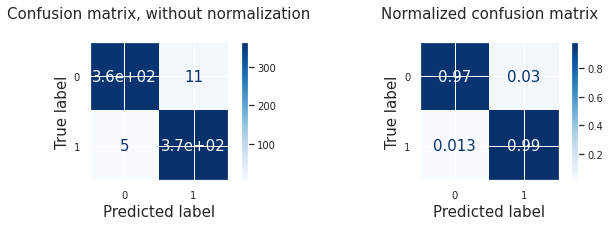

In [ ]:

from sklearn.metrics import plot_confusion_matrix

f,(ax1,ax2) = plt.subplots(1,2,figsize=(10,4))

cm1 = plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues,normalize=None,ax=ax1)
cm1.ax_.set_title("Confusion matrix, without normalization\n",fontsize=15)

cm2 = plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues,normalize="true",ax=ax2)
cm2.ax_.set_title("Normalized confusion matrix\n",fontsize=15)
plt.tight_layout(pad=3)

plt.show()

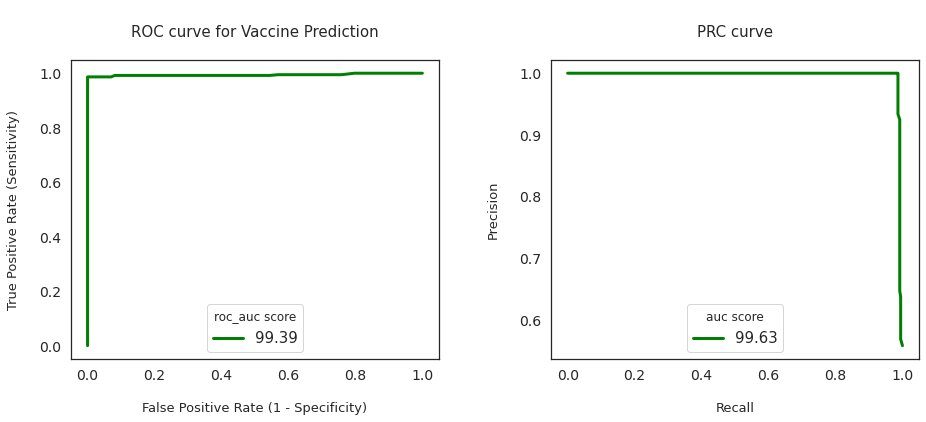

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score,precision_recall_curve,auc
sns.set(rc={"font.size":12,"axes.titlesize":18,"axes.labelsize":18,"xtick.labelsize":14,"ytick.labelsize":14,
            "legend.fontsize":12,'axes.grid' : False,'axes.facecolor': 'w','axes.edgecolor':"0.15"})
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
y_predict = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_predict)
plt.title('\nROC curve for Vaccine Prediction\n',fontsize=15)
plt.xlabel('\nFalse Positive Rate (1 - Specificity)',fontsize=13)
plt.ylabel('True Positive Rate (Sensitivity)\n',fontsize=13)
plt.plot(fpr, tpr,color='green',lw=3)
plt.legend(labels=[round(roc_auc_score(y_test,y_predict)*100,2)],loc=8,fontsize=15,title="roc_auc score")

plt.subplot(1,2,2)
precision, recall, thresholds = precision_recall_curve(y_test, y_predict)
plt.plot(recall, precision,color='green',lw=3)
plt.xlabel('\nRecall',fontsize=13)
plt.ylabel('Precision\n',fontsize=13)
plt.title('\nPRC curve\n',fontsize=15)
plt.legend(labels=[round(auc(recall, precision)*100,2)],loc=8,fontsize=15,title="auc score")
plt.tight_layout(pad=4)
plt.show()


In [ ]:
'''
import optuna

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 2000),
        #'max_depth': int(trial.suggest_float('max_depth', 10, 100, log=True)),
        'min_samples_split': trial.suggest_int('min_sample_split', 2, 6),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4,),
        'max_features': trial.suggest_categorical('max_features',["auto", "sqrt", "log2"]),
        'bootstrap':trial.suggest_categorical('bootstrap',[True,False]),
        'random_state': trial.suggest_int('random_state', 0, 100)
        #'scale_pos_weight': 0.48,
       }
        
    clf = ExtraTreesClassifier(**params)
    auccuracies = []
    X_train_k = x_train.values
    y_train_k = y_train.values
    kf = KFold(n_splits=3,random_state=None,shuffle=True)
    for train_idx, valid_idx in kf.split(X_train_k,y_train_k):
        train_data = X_train_k[train_idx, :], y_train_k[train_idx]
        valid_data = X_train_k[valid_idx, :], y_train_k[valid_idx]
        
        clf.fit(X_train_k[train_idx, :], y_train_k[train_idx])
        pred = clf.predict(X_train_k[valid_idx, :])
        accuracy = accuracy_score(y_train_k[valid_idx],pred)
        auccuracies.append(accuracy)
    print(f'Trial done: Accuracy values on folds: {auccuracies}')
    return np.average(auccuracies)

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

n_trials = 100

#FIT_XGB = True

#if FIT_XGB:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=n_trials)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
  print("    {}: {}".format(key, value))
'''

'\nimport optuna\n\ndef objective(trial):\n    params = {\n        \'n_estimators\': trial.suggest_int(\'n_estimators\', 100, 2000),\n        #\'max_depth\': int(trial.suggest_float(\'max_depth\', 10, 100, log=True)),\n        \'min_samples_split\': trial.suggest_int(\'min_sample_split\', 2, 6),\n        \'min_samples_leaf\': trial.suggest_int(\'min_samples_leaf\', 1, 4,),\n        \'max_features\': trial.suggest_categorical(\'max_features\',["auto", "sqrt", "log2"]),\n        \'bootstrap\':trial.suggest_categorical(\'bootstrap\',[True,False]),\n        \'random_state\': trial.suggest_int(\'random_state\', 0, 100)\n        #\'scale_pos_weight\': 0.48,\n       }\n        \n    clf = ExtraTreesClassifier(**params)\n    auccuracies = []\n    X_train_k = x_train.values\n    y_train_k = y_train.values\n    kf = KFold(n_splits=3,random_state=None,shuffle=True)\n    for train_idx, valid_idx in kf.split(X_train_k,y_train_k):\n        train_data = X_train_k[train_idx, :], y_train_k[train_idx]\n

## ML trainning

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier  

ec1 = ExtraTreesClassifier(
    n_estimators= 100,
    max_depth= None,
    min_samples_split=2,
    min_samples_leaf= 1,
    max_features= 'auto',
    max_leaf_nodes= None,
    bootstrap= False,
    random_state=36
    
     )
ec1.fit(x_train,y_train)
y_predict3 = ec1.predict(x_test)
y_train.value_counts()

Attrition
0            864
1            862
dtype: int64

## Evaluation of Machine learning model

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss,auc
print(f"\033[1mAccuracy score : {round(accuracy_score(y_test,y_predict3)*100,2)} %\n")
print(f"Log loss : {round(log_loss(y_test,y_predict3),2)} %\n")
print("Classification Report\n")
print(classification_report(y_test,y_predict3))


Accuracy score : 97.7 %

Log loss : 0.79 %

Classification Report

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       369
           1       0.96      0.99      0.98       371

    accuracy                           0.98       740
   macro avg       0.98      0.98      0.98       740
weighted avg       0.98      0.98      0.98       740



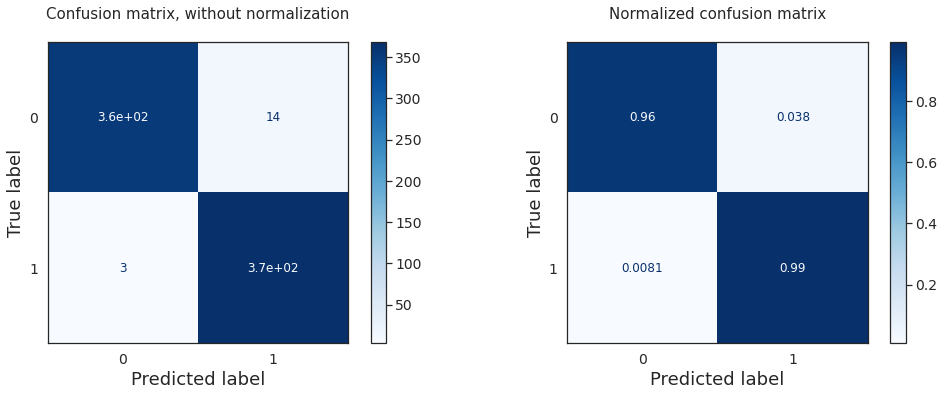

In [ ]:
from sklearn.metrics import plot_confusion_matrix

f,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

cm1 = plot_confusion_matrix(ec1, x_test, y_test, cmap=plt.cm.Blues,normalize=None,ax=ax1)
cm1.ax_.set_title("Confusion matrix, without normalization\n",fontsize=15)

cm2 = plot_confusion_matrix(ec1, x_test, y_test, cmap=plt.cm.Blues,normalize="true",ax=ax2)
cm2.ax_.set_title("Normalized confusion matrix\n",fontsize=15)
plt.tight_layout(pad=3)

plt.show()

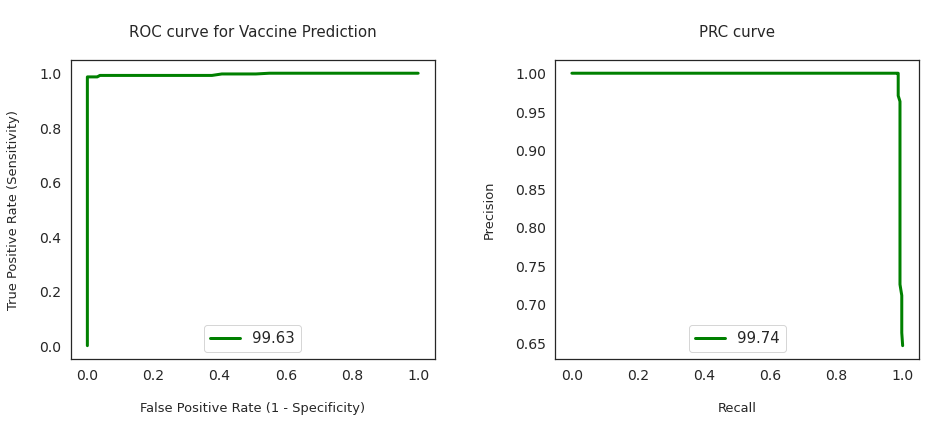

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score,precision_recall_curve,auc
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
y_predict3 = ec1.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_predict3)
plt.title('\nROC curve for Vaccine Prediction\n',fontsize=15)
plt.xlabel('\nFalse Positive Rate (1 - Specificity)',fontsize=13)
plt.ylabel('True Positive Rate (Sensitivity)\n',fontsize=13)
plt.plot(fpr, tpr,color='green',lw=3)
plt.legend(labels=[round(roc_auc_score(y_test,y_predict3)*100,2)],loc=8,fontsize=15)

plt.subplot(1,2,2)
precision, recall, thresholds = precision_recall_curve(y_test, y_predict3)
plt.plot(recall, precision,color='green',lw=3)
plt.xlabel('\nRecall',fontsize=13)
plt.ylabel('Precision\n',fontsize=13)
plt.title('\nPRC curve\n',fontsize=15)
plt.legend(labels=[round(auc(recall, precision)*100,2)],loc=8,fontsize=15)
plt.tight_layout(pad=4)
plt.show()

In [ ]:
df.to_csv('file2.csv', header=False, index=False) 

In [ ]:
x[["Attrition"]] = y_over

In [ ]:
x

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Attrition
0,0.572709,0.811385,-1.044679,-1.693804,1.418626,0.105221,0.119174,0.677587,1.790124,-1.141068,-0.248875,-0.832528,0.077234,0.152598,-0.946416,0.410463,-0.867967,-0.550799,0.464806,1.229257,-0.434749,-1.515916,-0.791774,-2.237395,0.603822,1.338527,-0.938854,-1.256781,0.974287,1.092260,1.249299,1
1,1.419983,-1.235273,-0.203105,-1.692123,-0.220007,0.105221,-0.120911,1.431448,-0.729058,2.089866,0.058680,0.182810,0.986349,1.127483,0.005224,0.997587,-1.855240,0.327772,-0.882093,-0.561262,2.300177,1.196891,0.365615,0.367617,-1.009422,-0.524231,-0.938854,0.795684,0.575185,-0.262626,-0.800449,0
2,0.149072,1.485315,-0.924454,-1.688762,1.319315,-0.828146,-0.903316,-1.694961,1.370261,-0.064090,-0.402652,0.182810,-1.286438,-1.147250,-0.946416,-1.057347,-0.867967,1.206342,-0.882093,0.333998,-0.434749,-0.611647,-0.791774,0.367617,0.603822,-0.524231,1.264013,0.795684,-1.021221,1.092260,1.249299,1
3,-0.274565,1.532565,-0.804229,-1.687081,-0.468284,-0.828146,-0.738790,1.188679,-0.729058,-1.141068,-0.248875,0.182810,0.531792,1.127483,0.701873,-1.057347,1.106578,1.206342,0.464806,0.333998,-0.434749,0.292622,-0.791774,0.367617,-1.009422,-0.524231,-0.938854,-1.256781,0.575185,-0.262626,1.249299,0
4,-0.910021,-0.459383,-0.924454,-1.683719,-1.262773,-0.828146,-0.583277,0.282186,1.790124,-0.871824,-0.556429,0.182810,-0.831881,-0.497326,0.399406,-0.470223,-1.855240,-1.429369,0.464806,-0.561262,-0.434749,1.196891,0.365615,0.367617,0.603822,-0.524231,0.529724,0.795684,-1.021221,-0.262626,-0.800449,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,-0.698202,0.072798,-1.044679,-0.323966,-1.461395,-0.828146,-0.902927,-1.098734,-0.729058,-1.141068,-1.325315,-0.832528,-1.059160,-1.147250,-0.946416,-1.057347,-0.867967,-0.550799,-0.882093,-1.456521,-0.434749,1.196891,0.365615,0.367617,0.603822,-0.524231,-0.938854,-1.256781,-1.021221,-0.262626,1.249299,1
2462,0.360890,0.861122,-0.443555,-0.128996,0.226893,-0.828146,-0.879280,-1.430110,1.790124,1.551377,-0.248875,-0.832528,-0.831881,-0.497326,0.399406,-0.470223,0.119305,1.206342,0.464806,-1.456521,2.300177,1.196891,-0.791774,-2.237395,0.603822,-0.524231,0.529724,0.795684,-1.021221,-0.262626,1.249299,1
2463,-0.698202,0.786517,-1.044679,1.711461,-1.461395,-0.828146,-0.216333,1.600469,1.790124,-0.333335,-0.863984,0.182810,-0.831881,-0.497326,0.399406,-0.470223,1.106578,-1.429369,0.464806,1.229257,-0.434749,-0.611647,2.680393,1.670123,0.603822,-0.524231,0.529724,0.795684,0.575185,-0.262626,1.249299,1
2464,2.161347,-0.832407,0.518244,-1.424879,0.326204,-0.828146,-0.167370,-1.401361,1.790124,0.743643,-0.402652,-0.832528,-0.150045,0.152598,0.956864,-0.176661,1.106578,-0.550799,0.464806,-0.561262,-0.434749,-1.515916,2.680393,0.367617,0.603822,-0.524231,-0.938854,-1.256781,0.575185,-0.262626,1.249299,1


In [ ]:
x.to_csv('Employattrition.csv', header=True, index=False) 

In [ ]:
feature[["Attrition"]] = y_over

In [ ]:
feature

,MonthlyRate,MonthlyIncome,DailyRate,Age,TotalWorkingYears,JobLevel,OverTime,YearsInCurrentRole,HourlyRate,YearsWithCurrManager,Attrition
0,0.677587,0.119174,0.811385,0.572709,-0.248875,0.105221,1.249299,0.152598,1.418626,0.410463,1
1,1.431448,-0.120911,-1.235273,1.419983,0.058680,0.105221,-0.800449,1.127483,-0.220007,0.997587,0
2,-1.694961,-0.903316,1.485315,0.149072,-0.402652,-0.828146,1.249299,-1.147250,1.319315,-1.057347,1
3,1.188679,-0.738790,1.532565,-0.274565,-0.248875,-0.828146,1.249299,1.127483,-0.468284,-1.057347,0
4,0.282186,-0.583277,-0.459383,-0.910021,-0.556429,-0.828146,-0.800449,-0.497326,-1.262773,-0.470223,0
...,...,...,...,...,...,...,...,...,...,...,...
2461,-1.098734,-0.902927,0.072798,-0.698202,-1.325315,-0.828146,1.249299,-1.147250,-1.461395,-1.057347,1
2462,-1.430110,-0.879280,0.861122,0.360890,-0.248875,-0.828146,1.249299,-0.497326,0.226893,-0.470223,1
2463,1.600469,-0.216333,0.786517,-0.698202,-0.863984,-0.828146,1.249299,-0.497326,-1.461395,-0.470223,1
2464,-1.401361,-0.167370,-0.832407,2.161347,-0.402652,-0.828146,1.249299,0.152598,0.326204,-0.176661,1


In [ ]:
feature.to_csv("Data.csv",index=False,header=True)

In [ ]:
feature.columns

Index(['MonthlyRate', 'MonthlyIncome', 'DailyRate', 'Age', 'TotalWorkingYears',
       'JobLevel', 'OverTime', 'YearsInCurrentRole', 'HourlyRate',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [ ]:
ec1.predict_proba([[1200,42000,1200,23,0,1,0,0,200,0]])[:,1][0]

0.14